# Importing Necessary Libraries

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical, plot_model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# (1) Loading The Dataset

In [2]:
def load_dataset(dataset_path):
    images = []
    labels = []

    for label_folder in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label_folder)

        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            img = cv2.imread(image_path)

            images.append(img)
            labels.append(label_folder)

    return np.array(images, dtype=object), np.array(labels, dtype=object)

# (2) Preprocessing The Images

(2.1) Resizing

In [3]:
def resize_images(images_arr, new_Height, new_Width):
    resized_images =  np.array([cv2.resize(img, (new_Height, new_Width)) for img in images_arr])

    return resized_images

(2.2) Normalizing

In [4]:
def normalize_images(images_arr):
    normalized_images = np.array([img / 255.0 for img in images_arr])

    return normalized_images

In [5]:
def preprocess_images(images_arr):
    resized_images = resize_images(images_arr, 128, 128)
    normalized_images = normalize_images(resized_images)

    return normalized_images

# (3) Label Encoding

In [6]:
# def label_encoding(data_labels):
#     # ('glioma': 0 / 'meningioma': 1 / 'notumor': 2 / 'pituitary': 3)
#     general_labels = np.array(['glioma', 'meningioma', 'notumor', 'pituitary'])

#     # Use numpy's vectorized operations for efficient label encoding
#     new_data_labels = np.where(general_labels == data_labels[:, None])[1]

#     return new_data_labels

In [16]:
def label_encoding(data_labels):
    # ('glioma': 0 / 'meningioma': 1 / 'notumor': 2 / 'pituitary': 3)
    general_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

    new_data_labels = []
    for label in data_labels:
        new_data_labels.append(general_labels.index(label))

    return to_categorical(new_data_labels, num_classes=len(general_labels))

# (4) Model Design

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 64)        0         
                                                                 
 flatten (Flatten)           (None, 254016)            0         
                                                                 
 dense (Dense)               (None, 128)               32514176  
                                                      

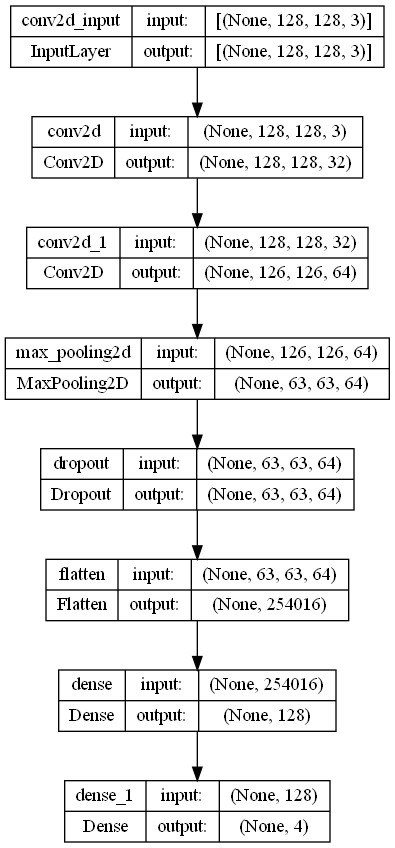

In [9]:
plot_model(model, show_shapes=True)

# Main Execution

In [10]:
brain_dataset_training_path = 'C:\\Users\\AORUS\\Desktop\\Brain Tumor Dataset\\Training'
train_images, train_labels = load_dataset(brain_dataset_training_path)

brain_dataset_testing_path = 'C:\\Users\\AORUS\\Desktop\\Brain Tumor Dataset\\Testing'
test_images, test_labels = load_dataset(brain_dataset_testing_path)

# Preview Samples Before / After preprocessing

In [11]:
def plot_images(images, title):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

In [12]:
def preview_samples(sample_size, arr_images, title, random_seed=None):
    if len(arr_images) <= sample_size:
        return arr_images[:]

    # Set random seed for reproducibility
    np.random.seed(random_seed)

    # Randomly select a number of samples from the array.
    samples = arr_images[np.random.choice(len(arr_images), sample_size, replace=False)]

    # Plot the samples and display the plot with the given title.
    plot_images(samples, title)

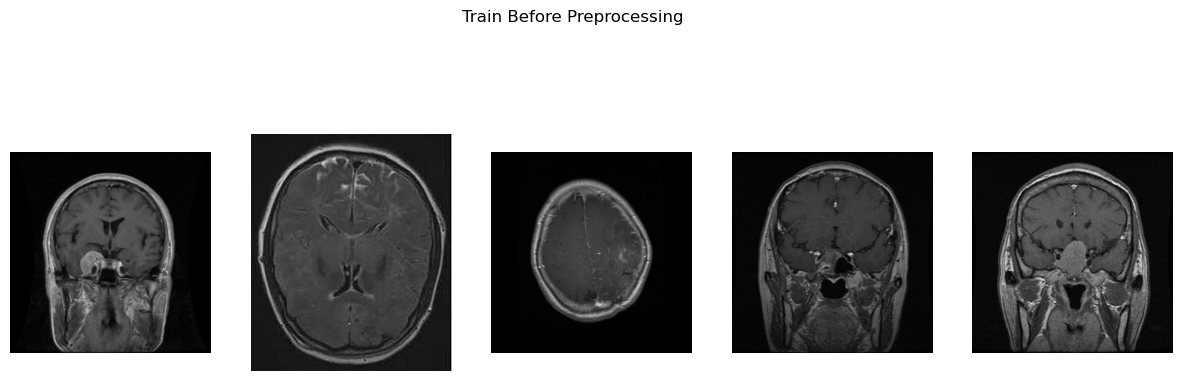

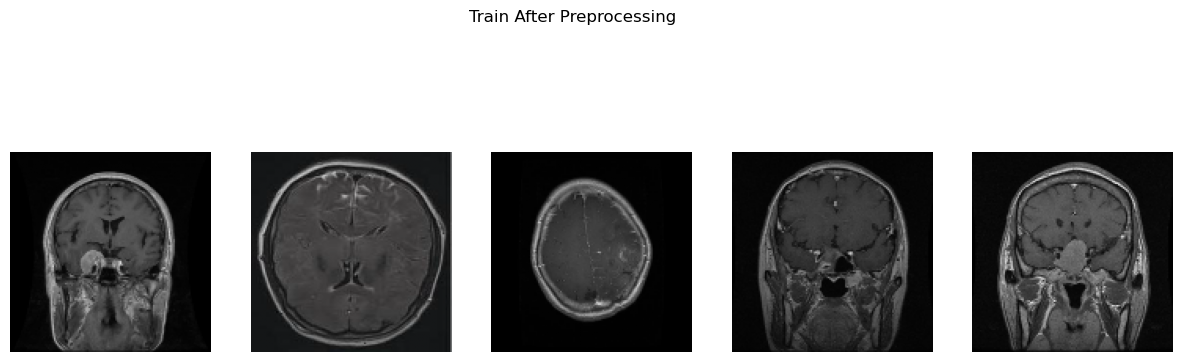

In [13]:
preview_samples(5, train_images, 'Train Before Preprocessing', random_seed=42)
train_images = preprocess_images(train_images)
preview_samples(5, train_images, 'Train After Preprocessing', random_seed=42)

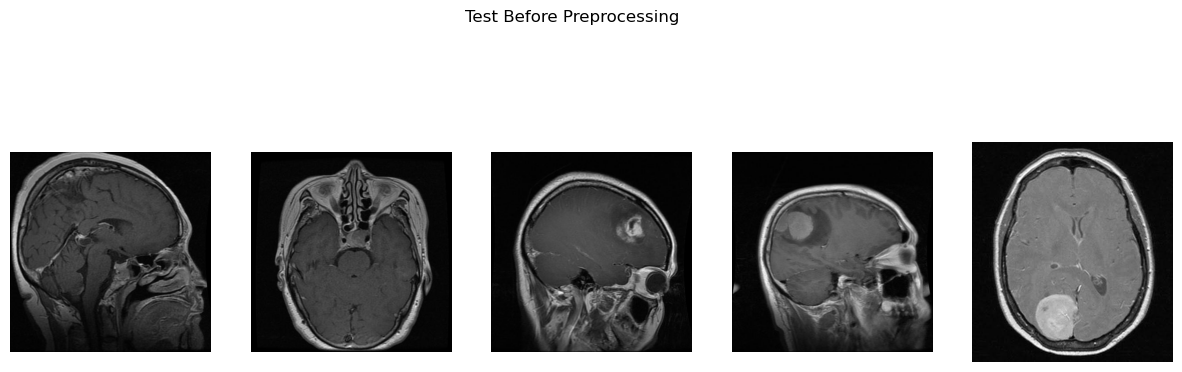

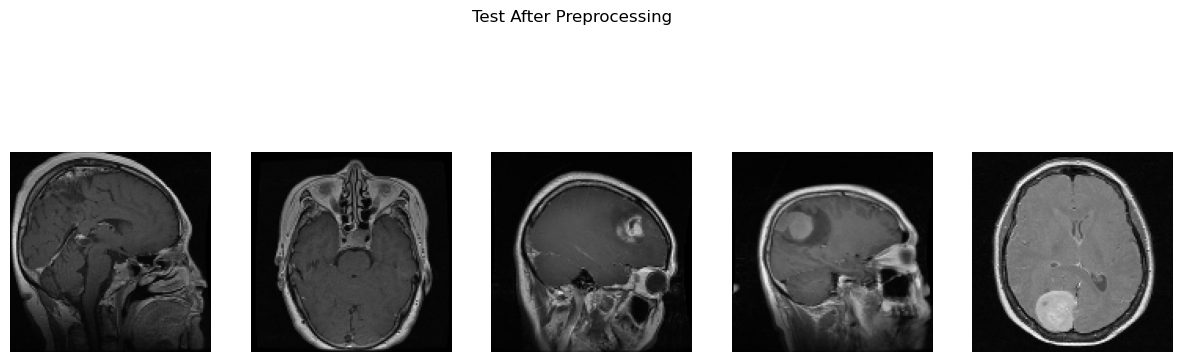

In [14]:
preview_samples(5, test_images, 'Test Before Preprocessing', random_seed=42)
test_images = preprocess_images(test_images)
preview_samples(5, test_images, 'Test After Preprocessing', random_seed=42)

In [22]:
encoded_train_labels = label_encoding(train_labels)
print("Encoded Train Labels: ", encoded_train_labels[:5])

encoded_test_labels = label_encoding(test_labels)
print("Encoded Test Labels: ", encoded_test_labels[:5])

Encoded Train Labels:  [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
Encoded Test Labels:  [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [23]:
print(f'Train images shape is : {train_images.shape}')
print(f'Train labels shape is : {train_labels.shape}')

print(f'Test images shape is : {test_images.shape}')
print(f'Test labels shape is : {test_labels.shape}')

Train images shape is : (5712, 128, 128, 3)
Train labels shape is : (5712,)
Test images shape is : (1311, 128, 128, 3)
Test labels shape is : (1311,)


# Model Training

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_images, encoded_train_labels, validation_split=0.2, batch_size=64, epochs=5, verbose=1)


Epoch 1/5


72/72 [==============================] - 63s 851ms/step - loss: 1.0170 - accuracy: 0.6454 - val_loss: 1.4817 - val_accuracy: 0.3080
Epoch 2/5
72/72 [==============================] - 62s 863ms/step - loss: 0.2801 - accuracy: 0.8989 - val_loss: 2.1623 - val_accuracy: 0.3832
Epoch 3/5
72/72 [==============================] - 62s 856ms/step - loss: 0.1036 - accuracy: 0.9670 - val_loss: 2.9346 - val_accuracy: 0.3648
Epoch 4/5
72/72 [==============================] - 64s 886ms/step - loss: 0.0540 - accuracy: 0.9845 - val_loss: 3.7940 - val_accuracy: 0.3955
Epoch 5/5
72/72 [==============================] - 65s 906ms/step - loss: 0.0208 - accuracy: 0.9956 - val_loss: 4.3134 - val_accuracy: 0.3823


# Plotting Results

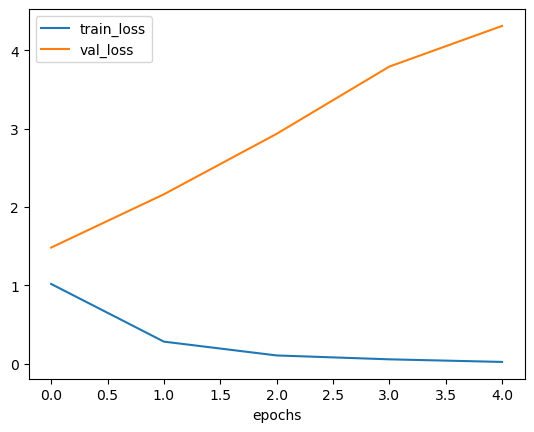

In [25]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.show()

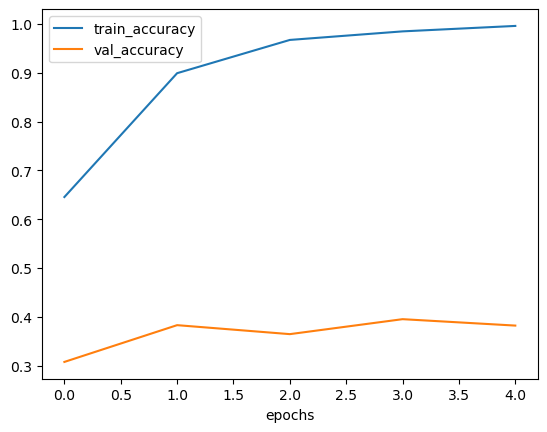

In [26]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.show()

# Model Evaluation

41/41 [==============================] - 3s 61ms/step
[[8.6425495e-01 1.2720461e-03 1.3357434e-01 8.9859584e-04]
 [9.9581015e-01 3.8103994e-03 3.7154768e-04 7.9372267e-06]
 [9.8620147e-01 1.3772531e-02 2.5992646e-05 4.2999080e-08]
 [4.0125836e-02 9.5977342e-01 9.6781208e-05 3.8938638e-06]
 [9.9169695e-01 8.2020881e-03 9.1153925e-05 9.8007549e-06]]
['glioma' 'glioma' 'glioma' ... 'pituitary' 'pituitary' 'pituitary']
['glioma' 'glioma' 'glioma' ... 'glioma' 'glioma' 'glioma']
(1311,)


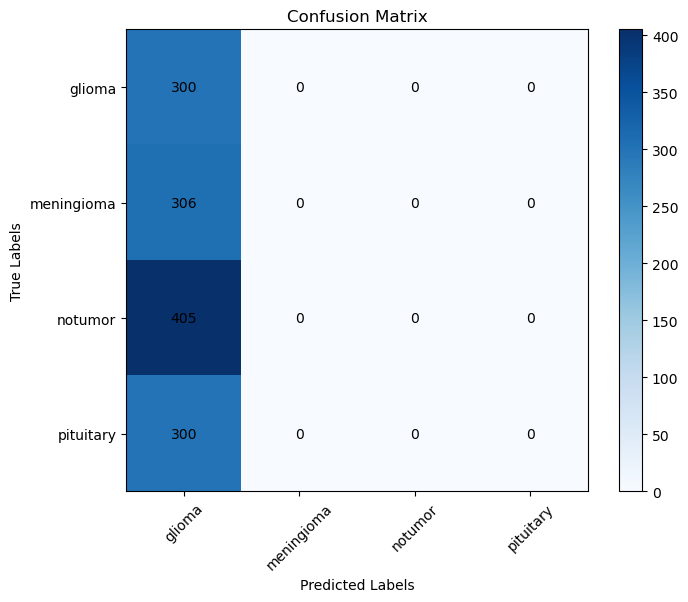

In [45]:
# Assuming 'X_test' is your set of test images
predictions = model.predict(test_images)
print(predictions[:5])
predicted_labels = np.array([test_labels[np.argmax(pred)] for pred in predictions])
print(test_labels)
print(predicted_labels)
print(predicted_labels.shape)

conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Create a figure and axis
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the plot
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add values to the cells
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center')

# Add axis labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()

In [ ]:
# evaluation = model.evaluate(test_images, encoded_test_labels)

# print("Test Loss:", evaluation[0])
# print("Test Accuracy:", evaluation[1])

41/41 [==============================] - 2s 57ms/step - loss: 1.5285 - accuracy: 0.7971
Test Loss: 1.5284967422485352
Test Accuracy: 0.7971014380455017
